<h2>Numerical Optimization - Function Tests</h2>
<p>This notebook provides test cases for all the functions defined in the numerical_methods module to help in understanding of the functions as well as the input / output.

In [4]:
# import the module
import numpy as np
import matplotlib.pyplot as plt

from numerical_methods import *
from utils import plot_root

<h3>Numerical Differentiation</h3>

In [5]:
# define some functions f and g for the computations
f = lambda x: x**2
g = lambda x: x**3 + a*(x**2) + 3*x
a = 3
x = 2

To compare the numerical approximation with the analytical derivative:

$$f(x) = x^2$$
$$f'(x) = 2 x$$
$$f'(2) = 4$$

$$g(x) = x^3 + a x^2 + 3 x$$
$$g'(x) = 3 x^2 + 2 a x + 3$$
$$g'(2) = 3(4) + 2(3)(2) + 3 = 27$$

In [6]:
step_sizes = [1, 0.1, 0.01, 0.001, 0.0001]

print("Considering f(x) = x^2; evaluate f'(2)")
print('-'*90)
for h in step_sizes:
    print(f"h = {h:<8} | forward diff = {round(forward_difference(f, x, h), 3):<10} | "
          f"backward diff = {round(backward_difference(f, x, h), 3):<10} | "
          f"central diff = {round(central_difference(f, x, h), 3):<10}")

print("\nConsidering g(x) = x^3 + ax^2 + 3x; evaluate g'(2)")
print('-'*90)
for h in step_sizes:
    print(f"h = {h:<8} | forward diff = {round(forward_difference(g, x, h, a), 3):<10} | "
          f"backward diff = {round(backward_difference(g, x, h, a), 3):<10} | "
          f"central diff = {round(central_difference(g, x, h, a), 3):<10}")

Considering f(x) = x^2; evaluate f'(2)
------------------------------------------------------------------------------------------
h = 1        | forward diff = 5.0        | backward diff = 3.0        | central diff = 4.0       
h = 0.1      | forward diff = 4.1        | backward diff = 3.9        | central diff = 4.0       
h = 0.01     | forward diff = 4.01       | backward diff = 3.99       | central diff = 4.0       
h = 0.001    | forward diff = 4.001      | backward diff = 3.999      | central diff = 4.0       
h = 0.0001   | forward diff = 4.0        | backward diff = 4.0        | central diff = 4.0       

Considering g(x) = x^3 + ax^2 + 3x; evaluate g'(2)
------------------------------------------------------------------------------------------
h = 1        | forward diff = 37.0       | backward diff = 19.0       | central diff = 28.0      
h = 0.1      | forward diff = 27.91      | backward diff = 26.11      | central diff = 27.01     
h = 0.01     | forward diff = 27.09      

<h3>Numerical Integration</h3>

In [7]:
# define some functions f and g for the computations
f = lambda x: x**2
g = lambda x: x**3 + m*(x**2) + 3*x
m = 2
a = 0
b = 1

To compare the numerical approximation with the analytical integration:

$$f(x) = x^2$$
$$\int f(x) dx = \frac{x^3}{3} = \frac{1}{3}, \quad at \quad x = [0, 1]$$

$$g(x) = x^3 + m x^2 + 3 x$$
$$\int g(x) dx = \frac{x^4}{4} + \frac{m x^3}{3} + \frac{3 x^3}{2} = \frac{29}{12}, \quad at \quad x = [0, 1], m = 2 $$

In [8]:
intervals = [1, 50, 100]

print("Considering f(x) = x^2; evaluate the integral from [a=0, b=1]")
print('-'*70)
for n in intervals:
    print(f"n = {n:<5} | Trapezoidal Area = {round(trapezoidal(f, a, b, n), 3):<10} | "
        f"Simpson's Area = {round(simpson(f, a, b, n), 3):<10}")
    
print("\nConsidering g(x) = x^3 + ax^2 + 3x; evaluate the integral from [a=0, b=1]")
print('-'*70)
for n in intervals:
    print(f"n = {n:<5} | Trapezoidal Area = {round(trapezoidal(g, a, b, n, m), 3):<10} | "
        f"Simpson's Area = {round(simpson(g, a, b, n, m), 3):<10}")

Considering f(x) = x^2; evaluate the integral from [a=0, b=1]
----------------------------------------------------------------------
n = 1     | Trapezoidal Area = 0.5        | Simpson's Area = 0.333     
n = 50    | Trapezoidal Area = 0.333      | Simpson's Area = 0.333     
n = 100   | Trapezoidal Area = 0.333      | Simpson's Area = 0.333     

Considering g(x) = x^3 + ax^2 + 3x; evaluate the integral from [a=0, b=1]
----------------------------------------------------------------------
n = 1     | Trapezoidal Area = 3.0        | Simpson's Area = 2.0       
n = 50    | Trapezoidal Area = 2.417      | Simpson's Area = 2.417     
n = 100   | Trapezoidal Area = 2.417      | Simpson's Area = 2.417     


<h3>Numerical Interpolation</h3>

In [9]:
# define a function for plotting
def plot_interpolation(ax, interp_fn, x_values, y_values, interp_title):
    x_interp = np.linspace(min(x_values), max(x_values), 100)
    y_interp = [interp_fn(x_values, y_values)(i) for i in x_interp]
    ax.plot(x_interp, f(x_interp), 'b', label='Actual function')
    ax.plot(x_interp, y_interp, 'r--', label='Interpolated function')
    ax.plot(x_values, y_values, 'ro', label='Data points')
    ax.set_title(interp_title)
    ax.legend()

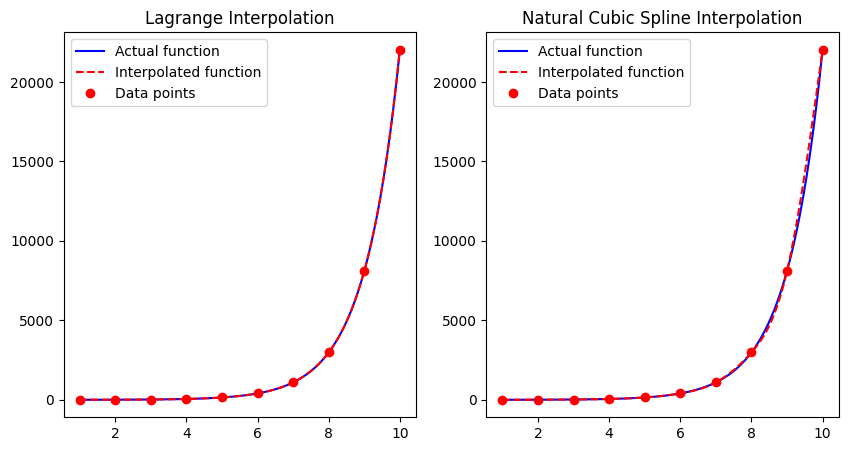

In [10]:
# define the data
x_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
f = lambda x: np.exp(x)
y_values = [f(x) for x in x_values]

# Define the figure and axes objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the Lagrange interpolation in the left subplot
plot_interpolation(ax1, lagrange_interpolation, x_values, y_values, 'Lagrange Interpolation')

# Plot the natural cubic spline interpolation in the right subplot
plot_interpolation(ax2, cubic_spline, x_values, y_values, 'Natural Cubic Spline Interpolation')

plt.show()

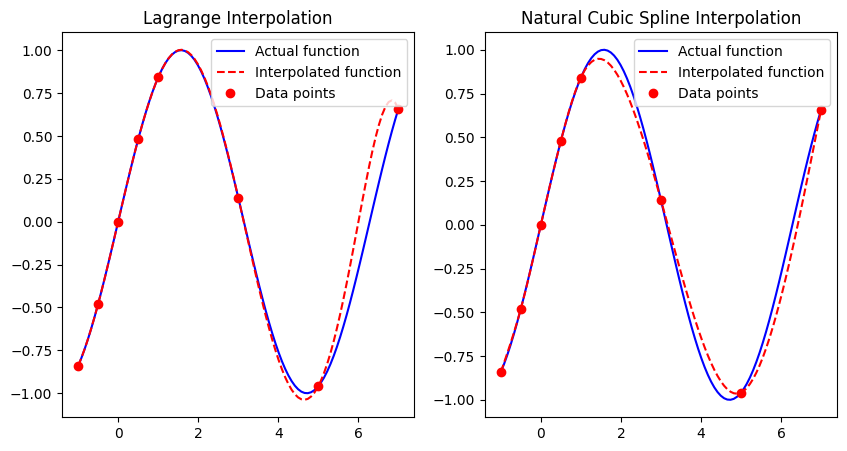

In [11]:
# define data - irregularly spaced data to develop error in the interpolation
x_values = [-1, -0.5, 0, 0.5, 1, 3, 5, 7]
f = lambda x: np.sin(x)
y_values = [f(x) for x in x_values]

# define the figure and axes objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot the Lagrange interpolation in the left subplot
plot_interpolation(ax1, lagrange_interpolation, x_values, y_values, 'Lagrange Interpolation')

# plot the natural cubic spline interpolation in the right subplot
plot_interpolation(ax2, cubic_spline, x_values, y_values, 'Natural Cubic Spline Interpolation')

plt.show()

<h3>Linear Algebra</h3>

In [12]:
# define matrix A and vector b
A = np.array([[6,2,2],[2,0.6667,0.3333],[1,2,-1]])
b = np.array([-2,1,0])

In [13]:
# for comparison, solve the system using numpy
x_np = np.linalg.solve(A, b)

In [14]:
def compare(sol, sol_np, tol=1e-6):
    if np.allclose(sol, sol_np, rtol=tol, atol=tol):
        print("Solution is correct per numpy's solution.")
    else:
        print("Solution is different from numpy's solution.")

In [15]:
# gaussain elimination method
x, _, _ = gauss_elim(A, b)
compare(x, x_np)

Solution is correct per numpy's solution.


In [16]:
# gaussain elimination with pivoting method
x, _, _ = gauss_elim_pivot(A, b)
compare(x, x_np)

Solution is correct per numpy's solution.


In [17]:
# gauss-seidel method
G = np.array([[4, -1, 0], [1, 3, -1], [0, 1, 2]])
s = np.array([2, 5, 1])

np_solution = np.linalg.solve(G, s)

# let the initial solution is the zero vector
x0 = np.array([0, 0, 0])
x, _, _ = gauss_seidel(G, s, x0, delta=1e-5, max_it=100)
print(f"x0 = {x0}")
print(f"Gauss-Seidel Solution: {x}")
print(f"Numpy Solution: {np_solution}")
print('\n')

# change the initial solution to be close to the original solution
x0 = np.array([0.8, 1.2, -0.1])
x, _, _ = gauss_seidel(G, s, x0, delta=1e-5, max_it=100)
print(f"x0 = {x0}")
print(f"Gauss-Seidel Solution: {x}")
print(f"Numpy Solution: {np_solution}")

Gauss-Seidel failed to find the correct solution in 100 iterations.
The last computed solution is: [0 1 0]
x0 = [0 0 0]
Gauss-Seidel Solution: [0 1 0]
Numpy Solution: [ 0.83333333  1.33333333 -0.16666667]


Gauss-Seidel converged to the correct solution in 34 iterations.
x0 = [ 0.8  1.2 -0.1]
Gauss-Seidel Solution: [ 0.83333293  1.33333373 -0.16666687]
Numpy Solution: [ 0.83333333  1.33333333 -0.16666667]


In [18]:
# jacobi method
x, _, _ = jacobi(G, s, x0, delta=1e-5, max_it=100)
print(f"x0 = {x0}")
print(f"Jacobi Solution: {x}")
print(f"Numpy Solution: {np_solution}")

Jacobi failed to find the correct solution in 100 iterations.
The last computed solution is: [ 0.83333537  1.3333313  -0.16667074]
x0 = [ 0.8  1.2 -0.1]
Jacobi Solution: [ 0.83333537  1.3333313  -0.16667074]
Numpy Solution: [ 0.83333333  1.33333333 -0.16666667]


<h3>Regression</h3>

In [19]:
def plot_fit(x, y, line_fit, title=None):
    """
    Plot the points and the line fit for linear regression.
    """
    # plot the points
    plt.scatter(x, y)

    # plot the line fit
    plt.plot(x, line_fit.y_pred, color='red')
    plt.xlabel("X")
    plt.ylabel("Y")
    
    # add a legend with the slope, intercept, and R-squared values
    plt.legend([f"y = {line_fit.slope:.2f}x + {line_fit.intercept:.2f}\nR-squared = {line_fit.r_squared:.2f}"])
    
    # set the title if provided
    if title is not None:
        plt.title(title)

    # show the plot
    plt.show()

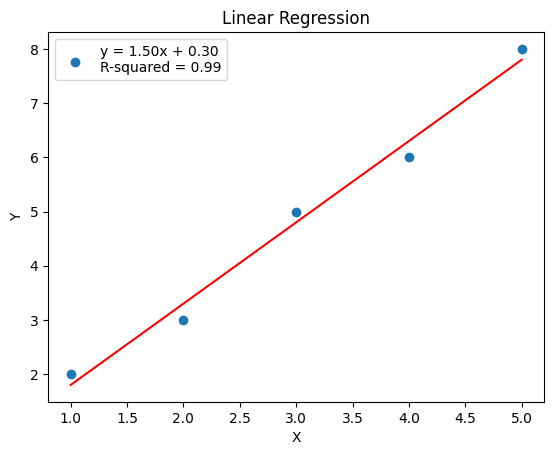

In [20]:
# generate some linear data - expected to produce a good linear fit
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 6, 8])

# perform linear regression
line_fit = linear(x, y)

plot_fit(x, y, line_fit, "Linear Regression")

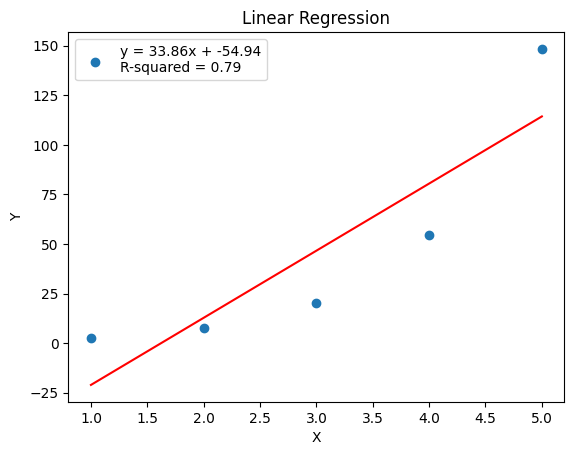

In [21]:
# generate some non-linear data - expected to produce a not-good fit
x = np.array([1, 2, 3, 4, 5])
f = lambda x: np.exp(x)
y = np.array([f(i) for i in x])

# perform linear regression
line_fit = linear(x, y)

plot_fit(x, y, line_fit, "Linear Regression")

### Root Finding Techniques

#### Bisection Method

In [22]:
# finding the initial interval
def find_initial_intervals(f):
    """
    param: f: function to be evaluated
    return a: function has positive value at a, b: function has negative value at b
    """
    # generate randomly a and b real values between -5, 5
    a = np.random.uniform(-100, 0)
    b = np.random.uniform(0, 100) 

    while f(a)*f(b) > 0:
        a = np.random.uniform(-100, 0)
        b = np.random.uniform(0, 100) 
    return (a, b) if a < b else (b, a)

Bisection method: function index: 1,  root = -2.6639225418881695e-08, solution: -7.991767483734845e-08


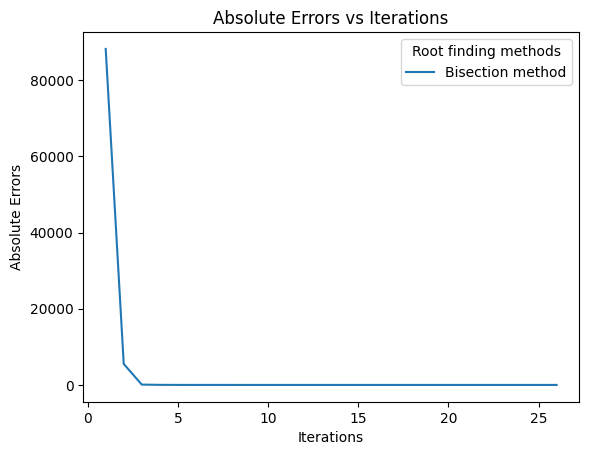

In [23]:
# finding the initial interval
(a,b) = find_initial_intervals(g)

# define the tolerance, maximum iteration, and index of the function
tol = 1e-6
N = 100
index = 1
        
# call the bisection method
bisection_root, bisection_E, _ = bisection(g, a, b, tol, N)


# print the guessing roots
print(f"Bisection method: function index: {index},  root = {bisection_root}, solution: {g(bisection_root)}")

        
# build data dictionary for plotting
data = {
    "Bisection method": {"errors": bisection_E, "color": "blue"},
    }
     
# plot the errors
plot_root(index, data)

#### Elimination Method

Elimination method: function index: 1,  root = 0.5676534115669603, solution: 2.530336209437117


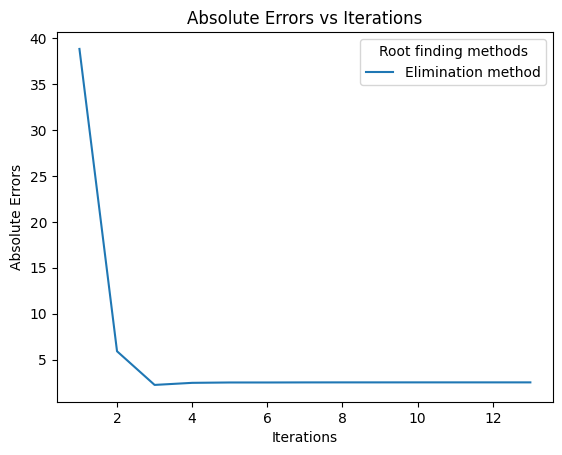

In [24]:
# finding the initial interval
(a,b) = find_initial_intervals(g)

# define the tolerance, maximum iteration, and index of the function
tol = 1e-6
N = 100
index = 1
        
# call the elimination method
elimination_root, elimination_E, _ = elimination_search(func=g, a=a, b=b, tol=tol, N=N)


# print the guessing roots
print(f"Elimination method: function index: {index},  root = {elimination_root}, solution: {g(elimination_root)}")

        
# build data dictionary for plotting
data = {
    "Elimination method": {"errors": elimination_E, "color": "blue"},
    }
     
# plot the errors
plot_root(index, data)

#### Fibonacci Method

Fibonacci method: function index: 1,  root = -69.53052057127708, solution: -326684.4401954007


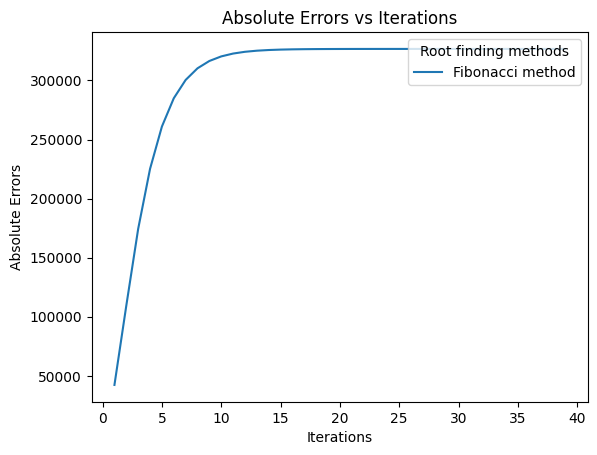

In [25]:
# finding the initial interval
(a,b) = find_initial_intervals(g)

# define the tolerance, maximum iteration, and index of the function
tol = 1e-6
N = 100
index = 1
        
# call the fibonacci method
fibonacci_root, fibonacci_E, _ = fibonacci_search(f=g, a=a, b=b, tol=tol, N=N)


# print the guessing roots
print(f"Fibonacci method: function index: {index},  root = {fibonacci_root}, solution: {g(fibonacci_root)}")
       
# build data dictionary for plotting
data = {
    "Fibonacci method": {"errors": fibonacci_E, "color": "blue"},
    }
     
# plot the errors
plot_root(index, data)

#### Golden Section Search Method

Golden Section Method: function index: 1,  root = -69.76498302497473, solution: -330031.82564806135


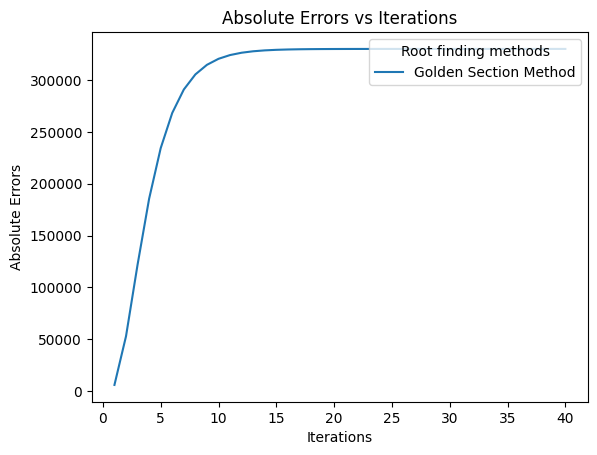

In [26]:
# finding the initial interval
(a,b) = find_initial_intervals(g)

# define the tolerance, maximum iteration, and index of the function
tol = 1e-6
N = 100
index = 1
        
# call the golden section method, GSM = Golden Section Method
GSM_root, GSM_E, _ = golden_search(f=g, a=a, b=b, tol=tol, N=N)


# print the guessing roots
print(f"Golden Section Method: function index: {index},  root = {GSM_root}, solution: {g(GSM_root)}")

        
# build data dictionary for plotting
data = {
    "Golden Section Method": {"errors": GSM_E, "color": "blue"},
    }
     
# plot the errors
plot_root(index, data)

#### Nelder Mead Method

x =  [-7.56467228e-05 -7.65704270e-05]
N =  24


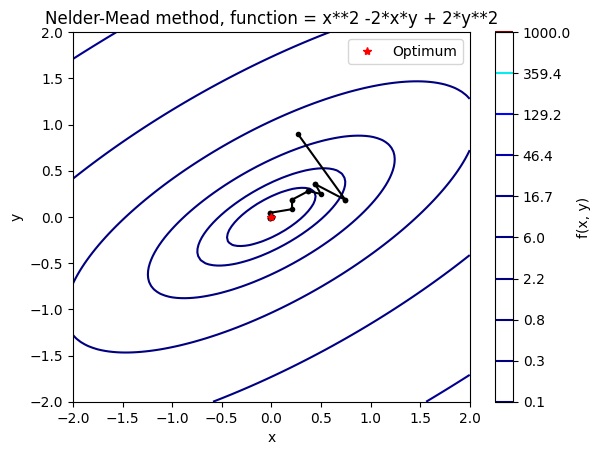

In [27]:
def func(x, y):
        return x**2 -2*x*y + 2*y**2 
    
x_min, E, N, history = nelder_mead(func, 3, 100, 1e-8)
print("x = ", x_min)
print("N = ", N)
    
    
# define the range of the contour plot
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
    
# plot the contour
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 10), cmap='jet')
plt.colorbar(label='f(x, y)')
    
    
# plot the movement of the best point during the iterations
plt.plot(history[:, 0], history[:, 1], 'k.-')
plt.plot(x_min[0], x_min[1], 'r*', label='Optimum')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nelder-Mead method, function = x**2 -2*x*y + 2*y**2')
plt.show()

#### Newton Hessians Method

x = [0. 0.]
f(x) = 0.0
N = 2


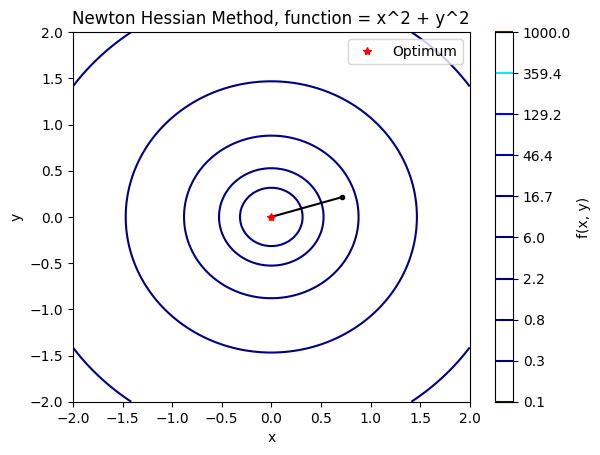

In [28]:
func = lambda x, y: (x ) ** 2 + (y) ** 2
variables = ['x', 'y']
tol = 1e-6
max_iters = 1000
x_min, E, N, history = newton_hessian(func, variables, tol, max_iters)
print(f'x = {x_min}')
print(f'f(x) = {func(*x_min)}')
print(f'N = {N}')
    
# define the range of the contour plot
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
    
# plot the contour
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 10), cmap='jet')
plt.colorbar(label='f(x, y)')
    
    
# plot the movement of the best point during the iterations
plt.plot(history[:, 0], history[:, 1], 'k.-')
plt.plot(x_min[0], x_min[1], 'r*', label='Optimum')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Newton Hessian Method, function = x^2 + y^2')
plt.show()

#### Netwon Raphson Method

Newton Raphson Method: function index: 1,  root = tensor([-1.8955], dtype=torch.float64, grad_fn=<SubBackward0>), solution: tensor([-5.3110], dtype=torch.float64, grad_fn=<AddBackward0>)


d:\Saeed Ahmad Work\Github Work\Numerical_Optimization_of_ai\numerical_methods\root_finding\newton.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  guess = torch.tensor(guess, requires_grad=True)


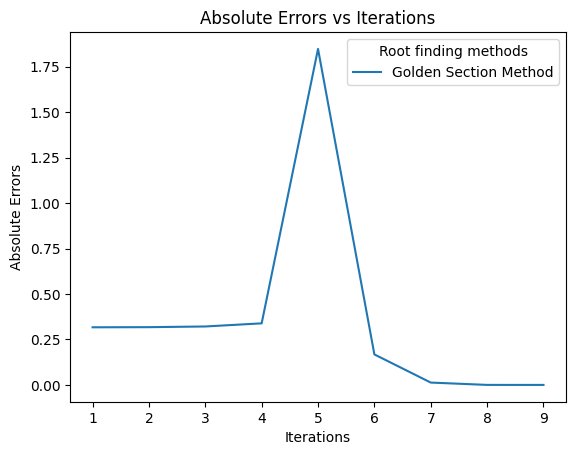

In [29]:
# import special function for newton having tensor
from functions import func4_torch

# random initial guess 
x0 = np.random.rand(1)

# define the tolerance, maximum iteration, and index of the function
tol = 1e-6
N = 100
index = 1
        
# call the newton raphson method, NR = Newton Raphson
NR_root, NR_E, _ = newton(f=func4_torch, x0=x0, tol=tol, max_iter=N)


# print the guessing roots for newton rapson
print(f"Newton Raphson Method: function index: {index},  root = {NR_root}, solution: {g(NR_root)}")

        
# build data dictionary for plotting
data = {
    "Golden Section Method": {"errors": NR_E, "color": "blue"},
    }
     
# plot the errors
plot_root(index, data)

#### Powell Conjugate Direction Method

x = [8.76700654e-05 1.85696493e-03]
f(x) = 6.578723076772633e-06
N = 6


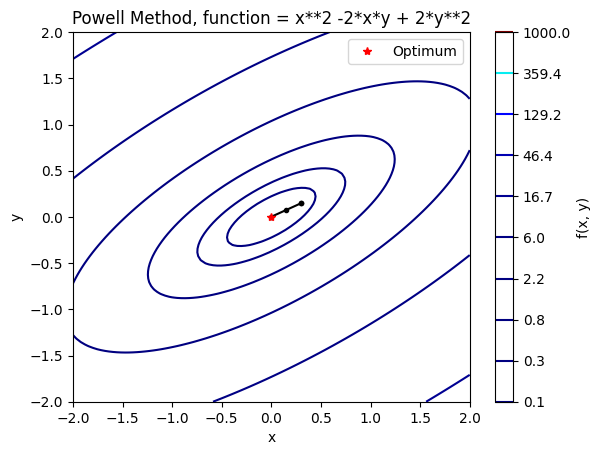

In [30]:
func = lambda x, y: x**2 -2*x*y + 2*y**2 
x0 = np.random.rand(2)
tol = 1e-6
max_iters = 1000
x_min, E, N, history = powell_conjugate_direction(func, x0, tol, max_iters)
print(f'x = {x_min}')
print(f'f(x) = {func(*x_min)}')
print(f'N = {N}')
    
# define the range of the contour plot
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
    
# plot the contour
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 10), cmap='jet')
plt.colorbar(label='f(x, y)')
    
    
# plot the movement of the best point during the iterations
plt.plot(history[:, 0], history[:, 1], 'k.-')
plt.plot(x_min[0], x_min[1], 'r*', label='Optimum')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Powell Method, function = x**2 -2*x*y + 2*y**2')
plt.show()

#### Regula Falsi Method

Regular Falsi Method: function index: 1,  root = 5.531897558815819, solution: 247.0859977910187


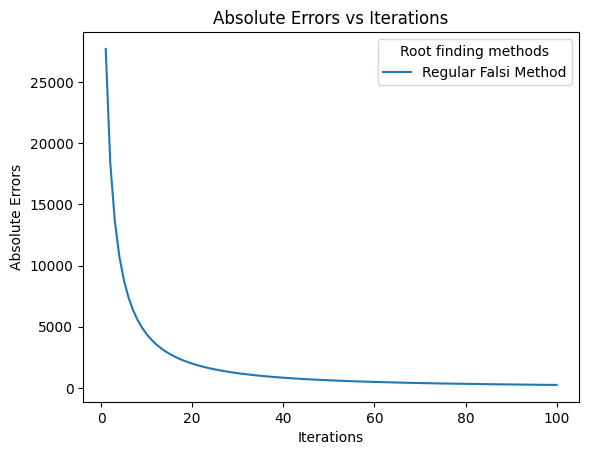

In [31]:
# finding the initial interval
(a,b) = find_initial_intervals(g)

# define the tolerance, maximum iteration, and index of the function
tol = 1e-6
N = 100
index = 1
        
# call the regula falsi method, RF = Regula Falsi
RF_root, RF_E, _ = regula_falsi(f=g, a=a, b=b, tol=tol, max_iter=N)


# print the guessing roots
print(f"Regular Falsi Method: function index: {index},  root = {RF_root}, solution: {g(RF_root)}")

        
# build data dictionary for plotting
data = {
    "Regular Falsi Method": {"errors": RF_E, "color": "blue"},
    }
     
# plot the errors
plot_root(index, data)

#### Secant Method

Secant Method: function index: 1,  root = 7.379924435846037e-11, solution: 2.2139773308627376e-10


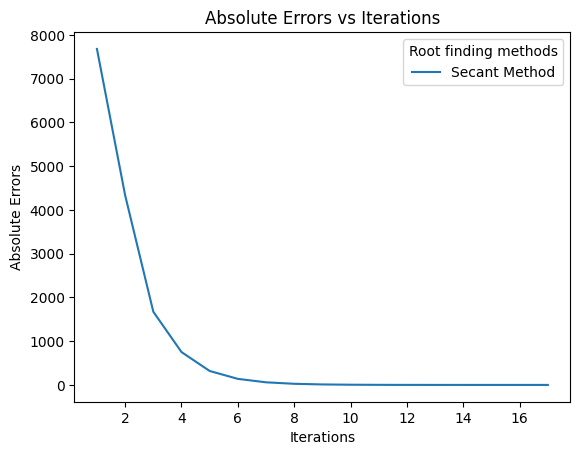

In [32]:
# finding the initial interval
(a,b) = find_initial_intervals(g)

# define the tolerance, maximum iteration, and index of the function
tol = 1e-6
N = 100
index = 1
        
# call the secant method, SM = Secant Method
SM_root, SM_E, _ = secant(f=g, a=a, b=b, tol=tol, max_iter=N)


# print the guessing roots
print(f"Secant Method: function index: {index},  root = {SM_root}, solution: {g(SM_root)}")

        
# build data dictionary for plotting
data = {
    "Secant Method": {"errors": SM_E, "color": "blue"},
    }
     
# plot the errors
plot_root(index, data)

#### Steepest Descent Method

x = [3.14102644e-06 1.08714291e-06]
f(x) = 1.1047926793008885e-11
N = 52


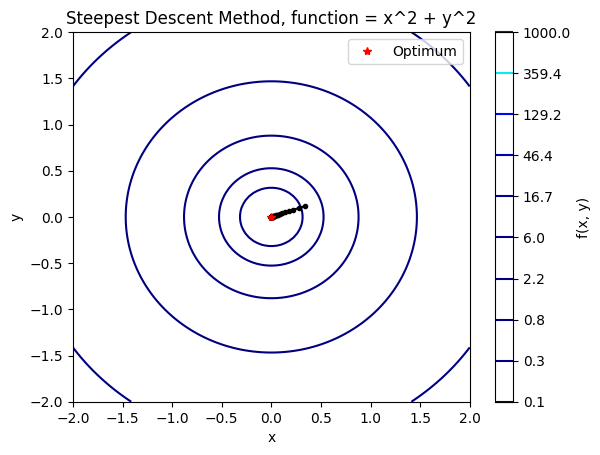

In [33]:
func = lambda x, y: (x) ** 2 + (y) ** 2
variables = ['x', 'y']
alpha = 0.1
tol = 1e-6
max_iters = 1000
x_min, E, N, history = steepest_descent(func, variables, alpha, tol, max_iters)
print(f'x = {x_min}')
print(f'f(x) = {func(*x_min)}')
print(f'N = {N}')
    
# define the range of the contour plot
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
    
# plot the contour
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 10), cmap='jet')
plt.colorbar(label='f(x, y)')
    
    
# plot the movement of the best point during the iterations
plt.plot(history[:, 0], history[:, 1], 'k.-')
plt.plot(x_min[0], x_min[1], 'r*', label='Optimum')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Steepest Descent Method, function = x^2 + y^2')
plt.show()

#### Qausi Newton Method

In [34]:
def rosenbrock(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2 ## rosenbrock function

##### A) Symmetric Rank One Method (SR1) 

In [35]:

x_init = [0.9, 0.9]  ## initial guess

## call the symmetric rank one method for the optimization of rosenbrock function
result = sr1(rosenbrock, x_init, epsilon=1e-8, max_iter=100)
print("Optimal result:", result)
print("Objective function value:", rosenbrock(result))

Optimal result: [0.93459237 0.88089985]
Objective function value: 0.00980898935670425


##### B)  Davidon Fletcher Powell Method (DFP)

In [36]:
x_init = [0.9, 0.9]  ## initial guess

## call the DFP for the optimization of rosenbrock function
result = dfp(rosenbrock, x_init, epsilon=1e-8, max_iter=100)
print("Optimal result:", result)
print("Objective function value:", rosenbrock(result))

Optimal result: [0.93459237 0.88089985]
Objective function value: 0.00980898935670425


##### C) Broyden Fletcher Goldfarb Shanno Method (BFGS)

In [37]:
x_init = [0.9, 0.9]  ## initial guess

## call the BFGS for the optimization of rosenbrock function
result = bfgs(rosenbrock, x_init, epsilon=1e-8, max_iter=100)
print("Optimal result:", result)
print("Objective function value:", rosenbrock(result))

Optimal result: [0.93459237 0.88089985]
Objective function value: 0.00980898935670425
